# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [52]:
# No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [53]:
# Your code here; open the labels.csv file stored in the zip file
import pandas as pd

labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [54]:
ls dog_breeds/train/ | head -5

ls: dog_breeds/train/: No such file or directory



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the testing data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as 'boston_bull', 'toy_poodle', and 'scottish_deerhound'.

You're nested file structure should look like this:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

> **Hint**: To do this, you can use the `os` module which will you to use execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder:
```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation and test sets. Then, use your pandas dataframe to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the dataframe to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [55]:
from keras.preprocessing.image import ImageDataGenerator

new_root_dir = 'data_org_subset/'

In [56]:
# Label train, test, validation directories
train_dir = '{}train/'.format(new_root_dir)
validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

In [57]:
# Rescale images to 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [58]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(240,240),
            batch_size=20,
            class_mode='categorical')

Found 233 images belonging to 3 classes.


In [59]:
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(240,240),
            batch_size=20,
            class_mode='categorical')

Found 30 images belonging to 3 classes.


In [60]:
test_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(240,240),
            batch_size=180,
            class_mode='categorical')

Found 30 images belonging to 3 classes.


In [61]:
train_generator.class_indices

{'boston_bull': 0, 'scottish_deerhound': 1, 'toy_poodle': 2}

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [14]:
# Create a baseline CNN model

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [62]:
# Your code here; add fully connected layers on top of the convolutional base

from keras.applications import VGG19


In [63]:
cnn_base = VGG19(weights='imagenet', include_top=False, input_shape=(240,240,3))

In [64]:
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 240, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0     

In [65]:
from keras import models
from keras import layers

In [66]:
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [67]:
cnn_base.trainable = False

In [68]:
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg19 False
flatten_4 True
dense_16 True
dense_17 True
dense_18 True
dense_19 True
dense_20 True


In [69]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [77]:
history = model.fit_generator(train_generator, steps_per_epoch=8,
                              epochs=8,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/8
8/8 [==============================] - 66s 8s/step - loss: 0.8331 - acc: 0.7712 - val_loss: 0.9563 - val_acc: 0.6667
Epoch 2/8
8/8 [==============================] - 73s 9s/step - loss: 0.7829 - acc: 0.7437 - val_loss: 0.7921 - val_acc: 0.7333
Epoch 3/8
8/8 [==============================] - 70s 9s/step - loss: 0.7035 - acc: 0.8431 - val_loss: 0.7370 - val_acc: 0.7000
Epoch 4/8
8/8 [==============================] - 70s 9s/step - loss: 0.6407 - acc: 0.8125 - val_loss: 0.8820 - val_acc: 0.7333
Epoch 5/8
8/8 [==============================] - 67s 8s/step - loss: 0.6177 - acc: 0.9041 - val_loss: 0.6532 - val_acc: 0.7667
Epoch 6/8
8/8 [==============================] - 70s 9s/step - loss: 0.5642 - acc: 0.8813 - val_loss: 0.5818 - val_acc: 0.7667
Epoch 7/8
8/8 [==============================] - 68s 9s/step - loss: 0.5106 - acc: 0.9346 - val_loss: 0.5802 - val_acc: 0.7333
Epoch 8/8
8/8 [==============================] - 72s 9s/step - loss: 0.4403 - acc: 0.9438 - val_loss: 0.6516 - 

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

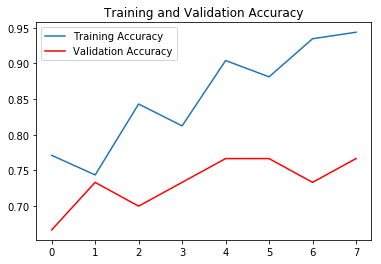

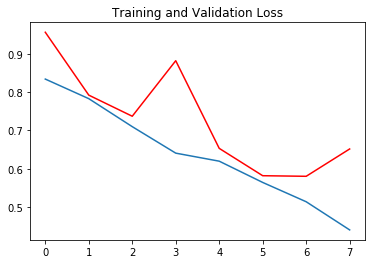

In [78]:
# Your code here; visualize the training / validation history associated with fitting the model.
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='r')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', color='r')
plt.
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Save model
model.save('vgg19_3breeds_4epochs.h5')

In [ ]:
import pickle

with open('history_vgg19__3breeds_4epochs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [ ]:
# Your code here
test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.